## **Automatidata project**
**Regression Analysis: Simplify complex data relationships**

## **Problem Context**


Automatidata works with its clients to transform their unused and stored data into useful solutions, such as performance dashboards, customer-facing tools, strategic business insights, and more. They specialize in identifying a client’s business needs and utilizing their data to meet those business needs. 


The data consulting firm Automatidata's newest client, the NYC Taxi and Limousine Commission (New York City TLC) is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The client wants the Automatidata team to build a multiple linear regression model for ride durations based on a variety of variables.

# Build a multiple linear regression model

**The project's goal**: build an multiple linear regression model to help estimate the ride duration based on variety of variables in the given dataset.

The project will include 3 main parts:


**Part 1:** EDA & Checking Model Assumptions
* Perform EDA and data preprocessing
* Check the multiple linear regression assumptions

**Part 2:** Model Building and evaluation
* Variables selection
* Model building
* Model Evaluation

**Part 3:** Interpreting Model Results

* What key insights emerged from the model?

* What business recommendations to propose based on the models built?

## **PACE stages**


   *        [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
   *        [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
   *        [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
   *        [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

<img src="images/pace/Plan.png" width="100" height="100" align=left>


# Pace: **Plan Stage**


- Who are your external stakeholders for this project?

- What are you trying to solve or accomplish?

### Step 1. Imports and loading


In [169]:
# Imports libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

In [170]:
# Data loading
data = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

<img src="images/pace/Analyze.png" width="100" height="100" align=left>

# PACE: **Analyze Stage**


## Step 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, inconsistent data, and duplicates.

In [171]:
data.shape

(22699, 18)

In [172]:
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

The dependent variables : `trip_duration` is missing

How can I engineer `trip_duration` variable?

 trip_duration = drop_off_time - pick_up_time 

In [174]:
# Create `trip_duration` in minute

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

data['trip_duration'] = round((data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime'])\
                              .dt.total_seconds()/60, 2)

In [175]:
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.07
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.50
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.20
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.25
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.72


Variables data type:

- Categorical variables: `RatecodeID, store_and_fwd_flag, payment_type, extra, mta_tax, passenger_count`


- Numerical variables: `trip_distance, fare_amount, tip_amount, tolls_amount, improvement_surcharge, total_amount, trip_duration`


- Date-time variables: `tpep_pickup_datetime, tpep_dropoff_datetime`

In [176]:
# Check for missing data
data = data.replace('NaN', np.nan)
data.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
trip_duration            0
dtype: int64

There's no missing values in the dataset

In [177]:
# check for duplicates
data.duplicated().all().sum()

0

There's no duplicated values

In [178]:
data.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,17.013766
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,61.996476
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-16.980000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,6.650000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.180000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,18.380000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,1439.550000


## Step 2b. Address any outliers

Use a boxplot to visualize any outliers.

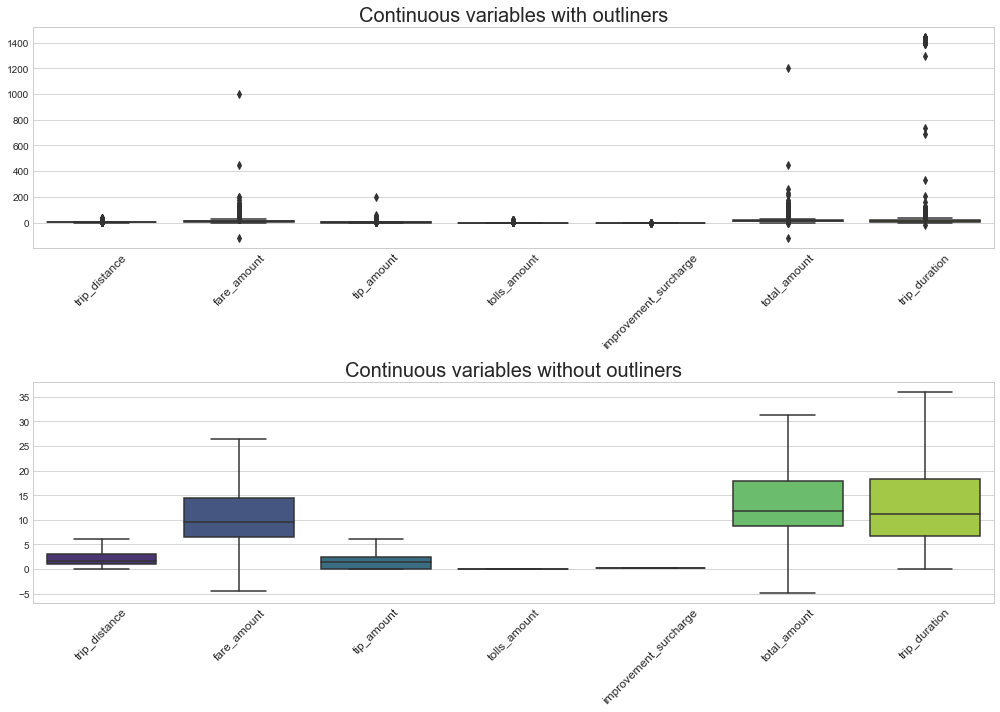

In [179]:
# Create boxplot to visualize the outliers
continuous_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount',
                  'improvement_surcharge', 'total_amount', 'trip_duration']

plt.figure(figsize = (14, 10))
plt.subplot(2, 1, 1)
fig = sns.boxplot(data = data[continuous_cols], palette = 'viridis')
fig.set_xticklabels(labels = continuous_cols, rotation = 45, fontsize = 12)
fig.set_title('Continuous variables with outliners', fontsize = 20)

plt.subplot(2, 1, 2)
fig2 = sns.boxplot(data = data[continuous_cols], showfliers = False, palette = 'viridis')
fig2.set_xticklabels(labels = continuous_cols, rotation = 45, fontsize = 12)
fig2.set_title('Continuous variables without outliners', fontsize = 20)

plt.tight_layout()
plt.show();

Outliners are extreme values that can skew the result of regression model so they need to be handled properly

In [180]:
# check outliers as in trip_duration using IQR method
Q3 = data['trip_duration'].quantile(0.75)
Q1 = data['trip_duration'].quantile(0.25)
iqr = Q3 - Q1
lower = Q1 - 1.5*iqr
upper = Q3 + 1.5*iqr

outliners = data[(data['trip_duration'] > upper) | (data['trip_duration'] < lower)]
display(outliners)
print(f'\nNumber of trip_duration outliners {outliners.shape[0]} ~ {round(outliners.shape[0]*100/data.shape[0], 2)}%')

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.50,1.0,0.5,9.86,0.00,0.3,59.16,59.63
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.00,0.0,0.5,14.58,5.54,0.3,72.92,36.80
21,85505540,2,2017-10-11 12:34:49,2017-10-11 13:22:38,1,12.30,5,N,138,265,1,68.25,0.0,0.0,12.00,16.26,0.3,96.81,47.82
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38,209.17
47,3377025,2,2017-01-13 02:37:24,2017-01-13 03:17:34,4,8.69,1,N,246,231,1,31.50,0.5,0.5,6.56,0.00,0.3,39.36,40.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22620,52171010,2,2017-06-19 20:24:09,2017-06-19 21:01:04,3,20.96,2,N,132,261,1,52.00,0.0,0.5,5.50,0.00,0.3,58.30,36.92
22638,27567057,2,2017-04-03 21:02:49,2017-04-04 21:01:28,1,1.73,1,N,107,249,2,9.00,0.5,0.5,0.00,0.00,0.3,10.30,1438.65
22641,103640191,2,2017-12-07 17:48:05,2017-12-07 18:31:56,2,7.03,1,N,237,66,2,29.50,1.0,0.5,0.00,0.00,0.3,31.30,43.85
22686,9039930,2,2017-02-08 18:13:26,2017-02-08 19:34:11,5,10.64,1,N,170,70,1,52.00,1.0,0.5,14.84,5.54,0.3,74.18,80.75



Number of trip_duration outliners 1228 ~ 5.41%


As outliners accounted for over 5.41% total observations, I decide to reassigning outliners to its corresponding limit in order to ensure the data size.

In [181]:
data['trip_duration'] = data['trip_duration'].apply(lambda x: upper if x > upper else 0 if x < 0 else x)

data["trip_duration"].describe()

count    22699.000000
mean        13.667467
std          9.242088
min          0.000000
25%          6.650000
50%         11.180000
75%         18.380000
max         35.975000
Name: trip_duration, dtype: float64

The same method is applied to other continuous variables containing outliners

In [182]:
outliner_cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
for i in outliner_cols:
    # calculate IQR and limits
    Q3 = data[i].quantile(0.75)
    Q1 = data[i].quantile(0.25)
    iqr = Q3 - Q1
    lower = Q1 - 1.5*iqr
    upper = Q3 + 1.5*iqr
    # determine outliners
    outliners = data[(data[i] > upper) | (data[i] < lower)]
    print(f'{i} has {outliners.shape[0]} outliners ~ {round(outliners.shape[0]*100/data.shape[0], 2)}%')
    # replace outliners with corresponding limit
    data[i] = data[i].apply(lambda x: upper if x > upper else 0 if x < 0 else x)
    print(f"{i}'s outliners have been reassigned\n")

trip_distance has 2527 outliners ~ 11.13%
trip_distance's outliners have been reassigned

fare_amount has 2064 outliners ~ 9.09%
fare_amount's outliners have been reassigned

tip_amount has 1186 outliners ~ 5.22%
tip_amount's outliners have been reassigned

total_amount has 2161 outliners ~ 9.52%
total_amount's outliners have been reassigned



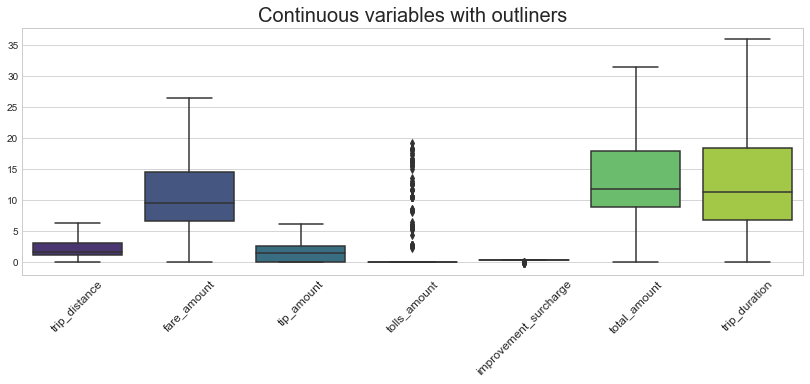

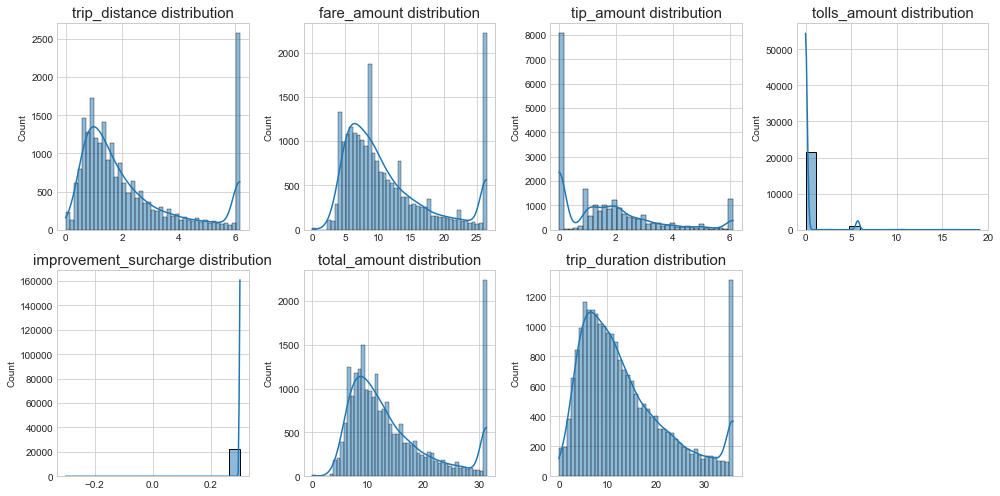

In [183]:
# outliners validation
plt.figure(figsize = (14, 10))
plt.subplot(2, 1, 1)
fig = sns.boxplot(data = data[continuous_cols], palette = 'viridis')
fig.set_xticklabels(labels = continuous_cols, rotation = 45, fontsize = 12)
fig.set_title('Continuous variables with outliners', fontsize = 20)

fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (14, 7))
for c in range(2):
    for r in range(4):
        i = c*4 + r
        if i < len(continuous_cols):
            ax = axes[c, r]
            sns.histplot(data[continuous_cols[i]], ax = ax, kde = True)
            ax.set_title(f'{continuous_cols[i]} distribution', fontsize = 15)
            ax.set_xlabel(None)
axes.flat[-1].set_visible(False)
plt.tight_layout()
plt.show();

## Step 2c. Identify correlations

### independent continuous variables vs `trip_duration`

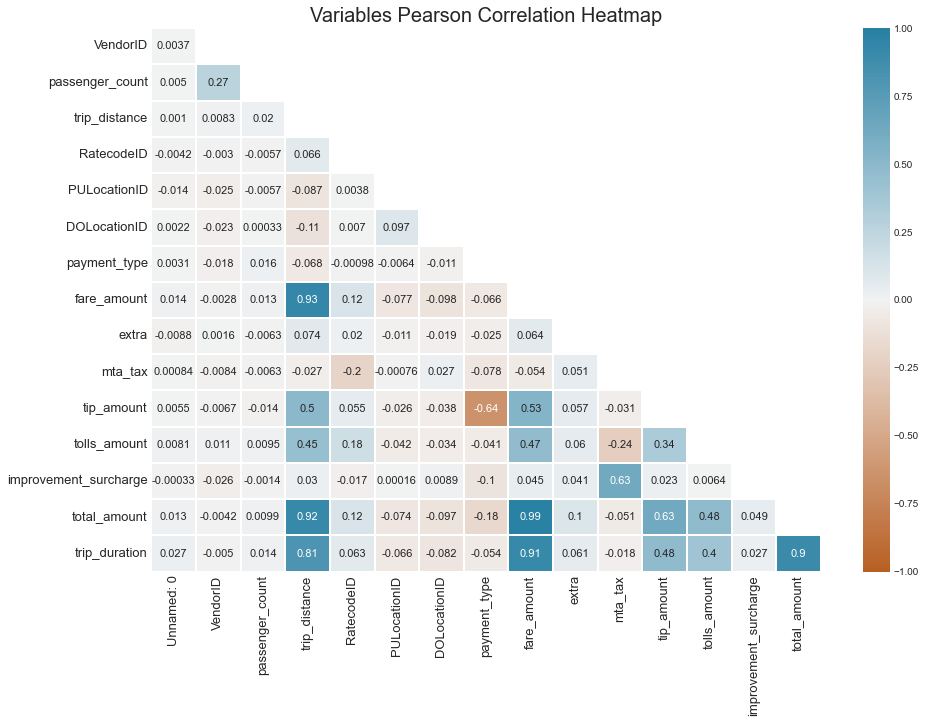

In [184]:
# Correlation matrix to help determine most correlated variables
mask = np.triu(np.ones_like(data.corr(method = 'pearson')))[1:, :-1]
cmap = sns.diverging_palette(30, 230, 90, 50, as_cmap = True)
corr_matrix = data.corr(method = 'pearson').iloc[1:, :-1]

fig = plt.figure(figsize = (15, 10))
axes = sns.heatmap(corr_matrix, mask = mask, cmap = cmap, annot = True, annot_kws = {'size' : 11},
                   linewidth = 1, linecolor = 'white', vmin = -1, vmax = 1)
xticks = [i for i in corr_matrix.columns]
yticks = [i for i in corr_matrix.index]
axes.set_xticklabels(xticks, fontsize = 13, rotation = 90)
axes.set_yticklabels(yticks, fontsize = 13)
axes.set_title('Variables Pearson Correlation Heatmap', fontsize = 20)
plt.show();

fig.savefig("images/corr_matrix.png", dpi=300, bbox_inches='tight')

Based on the correlation matrix, independent variables meet the linearity assumption (correlation with trip duration >= 0.4) are:

- `total_amount` (highest correlation score: 0.9)
- `trip_distance`
- `fare_amount`
- `tip_amount`
- `tolls_amount`

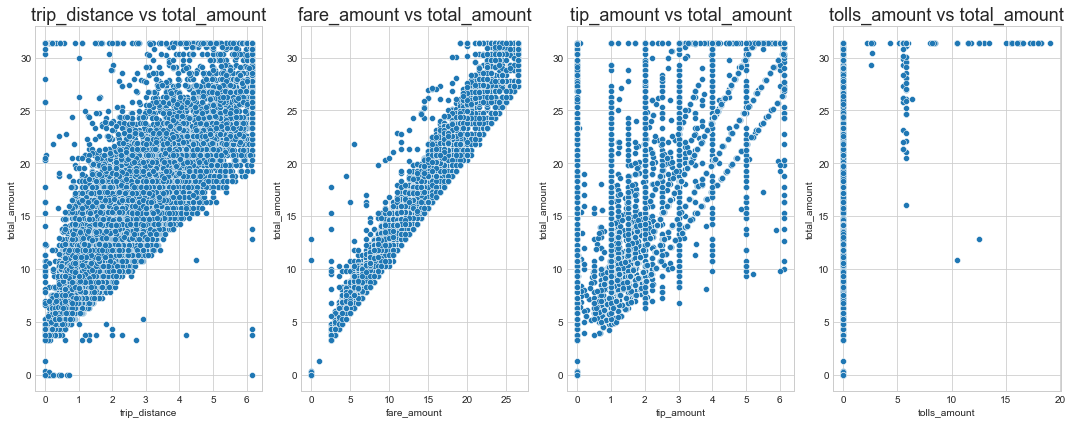

In [185]:
# create scatter plot to confirm the relationship between above variables to total_amount
cols = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount']
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 6))
for i in range(4):
    ax = axes[i]
    sns.scatterplot(x = data[cols[i]], y = data['total_amount'], ax = ax)
    ax.set_title(f'{cols[i]} vs total_amount', fontsize = 18)

plt.tight_layout()
plt.show();

fig.savefig('images/multilinearity_assump.png', dpi = 300, bbox_inches = 'tight')

- It's clear that `fare_amount`, `trip_distance` have a strong relationship with `total_amount`, thus `trip_distance` and `fare_amount` can not be included in the model if `total_amount` is selected.


- While `tip_amount` have a moderate relationship with `total_amount`, that of `tolls_amount` is weak and unclear. Hypothesis testing would need to be conducted to further confirm `tolls_amount` and `total_amount` relationships are statistically significant and populationally presentative.

Based on above analysis, variables violate no-multicollinearity assumption (no two independent variables can be highly correlated with each other) are:

-  `trip_distance` have strong relationship with `total_amount` (correlation score = 0.92)

Continuous variables are selected for multi linear model are:

- `total_amount`
- `tip_amount`
- `tolls_amount`

### independent categorical variables vs `trip_duration`

In [186]:
# Create correlation heatmap
cate_cols = ['RatecodeID', 'store_and_fwd_flag', 'payment_type', 'extra', 'mta_tax', 'passenger_count']
for i in cate_cols:
    print(data.groupby(i)['trip_duration'].mean())
    print('\n')

RatecodeID
1     13.212509
2     31.973977
3     28.462564
4     29.593125
5     13.063456
99     0.000000
Name: trip_duration, dtype: float64


store_and_fwd_flag
N    13.657891
Y    15.853485
Name: trip_duration, dtype: float64


payment_type
1    14.013751
2    12.991949
3    10.558967
4    13.647609
Name: trip_duration, dtype: float64


extra
-1.0     2.835000
-0.5     1.954286
 0.0    14.141041
 0.5    12.414013
 1.0    14.054266
 4.5    33.312624
Name: trip_duration, dtype: float64


mta_tax
-0.5     2.005385
 0.0    20.380778
 0.5    13.647437
Name: trip_duration, dtype: float64


passenger_count
0    13.717576
1    13.500154
2    14.164629
3    14.459895
4    14.352593
5    13.798513
6    13.429517
Name: trip_duration, dtype: float64




There are inconsistent data values and need to be romved in `RatecodeID`, `mta_tax`, `extra`

In [187]:
# remove inconsistent data in RatecodeID, mta_tax, extra variables
data['RatecodeID'] = data[data['RatecodeID'] != 99]['RatecodeID']
data['mta_tax'] = data[data['mta_tax'] >= 0]['mta_tax']
data['extra'] = data[data['extra'] >= 0]['extra']

data.dropna(inplace = True)

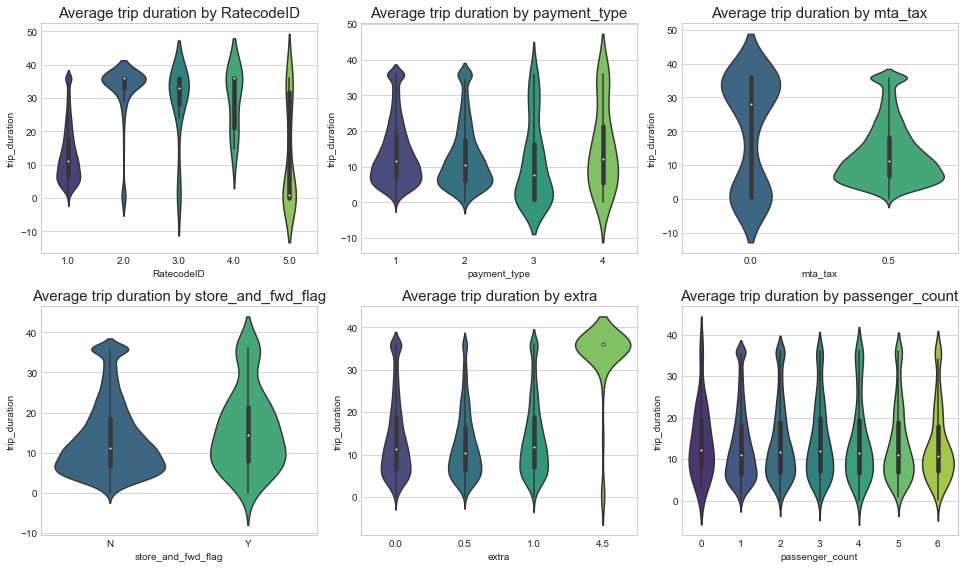

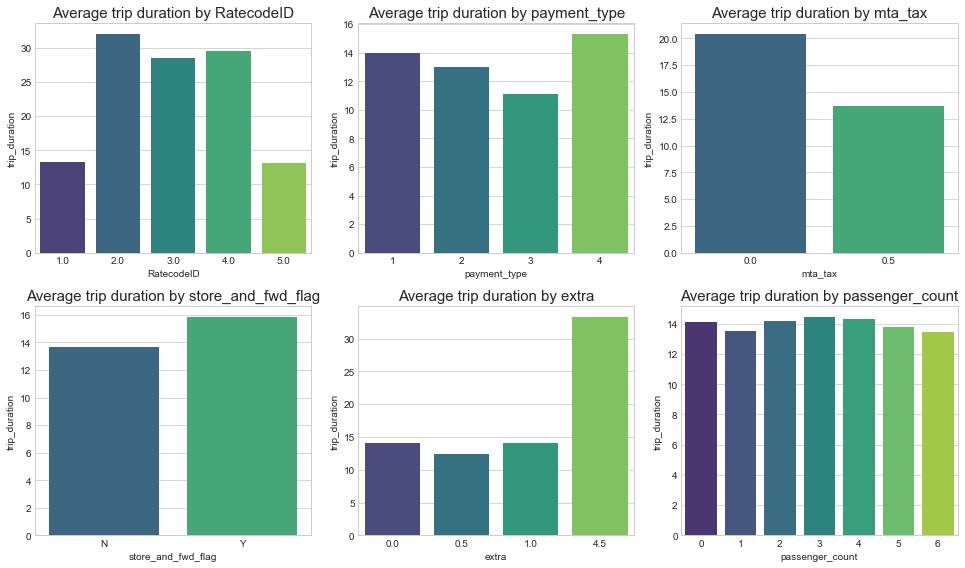

In [188]:
# inconsistent data validation
fig1, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (4.5*3, 4*2))
for c in range(3):
    for r in range(2):
        i = c*2 + r
        axes = ax[r, c]
        sns.violinplot(x = data[cate_cols[i]], y = data['trip_duration'], ax = axes, palette = 'viridis')
        axes.set_title(f'Average trip duration by {cate_cols[i]}', fontsize = 15)
plt.tight_layout()

fig2, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (4.5*3, 4*2))
for c in range(3):
    for r in range(2):
        i = c*2 + r
        axes = ax[r, c]
        mean = data.groupby(cate_cols[i])['trip_duration'].mean()
        sns.barplot(x = mean.index, y = mean, ax = axes, palette = 'viridis')
        axes.set_title(f'Average trip duration by {cate_cols[i]}', fontsize = 15)
plt.tight_layout()
plt.show();

fig1.savefig("images/group_dist_violin.png", dpi=300, bbox_inches='tight')
fig2.savefig("images/group_mean_bar.png", dpi=300, bbox_inches='tight')

Based on groups' distribution and average `trip_duration` values in each categorical variables, the relationship between `store_and_fwd_flag`, `extra`, `passenger_count` and `trip_duration` is weak and not substantial. 

Some possible impactful variables could be included in the model based on the above analysis are: `mta_tax`, `RatecodeID`, `payment_type`

### Perform label encoding for `mta_tax`


Since `mta_tax` only includes 2 values 0.5 and 0 indicating whether an particular trip being charged MTA tax based on the metered rate in use. Therefore, this variable is should be encode to binary label

In [189]:
# label encoding `mta_tax` variable
data['mta_tax'] = data['mta_tax'].apply(lambda x: '1' if x == 0.5 else '0')

In [190]:
# transform data type
data['RatecodeID'] = data['RatecodeID'].astype('object')
data['payment_type'] = data['payment_type'].astype('object')

<img src="images/pace/Construct.png" width="100" height="100" align=left>

# PACE: **Construct Stage**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.


**What variables were selected and why?**

The variables were selected for modeling after considering 2 assumptions 
- Linearity: Each predictor (Xi) is linearly related to the outcome variable (Y)
- No multicollinearity: no two independent variables $(X_i, X_j)$ can be highly correlated with each other.
   - `mta_tax`
   - `RatecodeID`
   - `payment_type`
   - `total_amount`
   - `tip_amount`
   - `tolls_amount`
   
Other assumptions will be validated after the model is built:
- Normality : the errors/residuals ($y-\hat{y}$) are normally distributed
- Homoscedasticity : the variance of the error is constant or similar across the model.

## Step 3a. Feature selection

In [191]:
# select variables for modeling
final_data = data[['mta_tax', 'RatecodeID', 'payment_type', 'total_amount',
                 'tip_amount', 'tolls_amount', 'trip_duration']]
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22685 entries, 0 to 22698
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mta_tax        22685 non-null  object 
 1   RatecodeID     22685 non-null  object 
 2   payment_type   22685 non-null  object 
 3   total_amount   22685 non-null  float64
 4   tip_amount     22685 non-null  float64
 5   tolls_amount   22685 non-null  float64
 6   trip_duration  22685 non-null  float64
dtypes: float64(4), object(3)
memory usage: 2.0+ MB


In [192]:
final_data.head()

,mta_tax,RatecodeID,payment_type,total_amount,tip_amount,tolls_amount,trip_duration
0,1,1,1,16.56,2.760,0.0,14.07
1,1,1,1,20.80,4.000,0.0,26.50
2,1,1,1,8.75,1.450,0.0,7.20
3,1,1,1,27.69,6.125,0.0,30.25
4,1,1,2,17.80,0.000,0.0,16.72


## Step 3b. OLS modeling

In [193]:
from statsmodels.formula.api import ols
ols_formula = '''trip_duration ~ C(mta_tax) + C(RatecodeID) + C(payment_type)
                + total_amount + tip_amount + tolls_amount'''
OLS = ols(formula = ols_formula, data = final_data)
ols_model = OLS.fit()

## Step 3c. Model evaludation and conclusion

In [194]:
# making predictions for assumptions validation
X = final_data.iloc[:, :-1]
residuals = ols_model.resid
fitted_values = ols_model.predict(X)
results = pd.DataFrame({'Actual' : final_data.iloc[:, -1],
                       'Predicted' : fitted_values,
                       'Residuals' : residuals})
results

,Actual,Predicted,Residuals
0,14.070,15.390908,-1.320908
1,26.500,19.722010,6.777990
2,7.200,6.872168,0.327832
3,30.250,26.698964,3.551036
4,16.720,19.477940,-2.757940
...,...,...,...
22694,3.270,5.271177,-2.001177
22695,35.975,30.219555,5.755445
22696,4.130,4.679229,-0.549229
22697,11.930,11.764895,0.165105


In [195]:
R_squared = 1 - (np.sum(residuals**2)/np.sum((results['Actual'] - results['Actual'].mean())**2))
RMSE = np.sqrt(np.sum(residuals**2)/residuals.size)
MAE = np.sum(np.abs(residuals))/residuals.size
print(f'R-squred: {R_squared}\nRoot Mean Squared Error: {RMSE}\nMean Absolute Error : {MAE}')

R-squred: 0.8317357020036535
Root Mean Squared Error: 3.7902638290687216
Mean Absolute Error : 2.3987152774207345


In [196]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 1.019e+04
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        00:24:15   Log-Likelihood:                -62415.
No. Observations:               22685   AIC:                         1.249e+05
Df Residuals:                   22673   BIC:                         1.250e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.7297      0.826      4.514      0.000       2.110       5.349
C(mta_tax)[T.1]         -6.4113      0.824     -7.779      0.000      -8.027      -4.796
C(RatecodeID)[T.2.0]     0.2948      0.195      1.511      0.131      -0.088       0.677
C(RatecodeID)[T.3.0]    -6.8402      1.049     -6.522      0.000      -8.896      -4.785
C(RatecodeID)[T.4.0]    -4.1409      1.344     -3.082      0.002      -6.774      -1.507
C(RatecodeID)[T.5.0]   -17.6047      0.717    -24.540      0.000     -19.011     -16.199
C(payment_type)[T.2]     1.0863      0.079     13.697      0.000       0.931       1.242
C(payment_type)[T.3]    -0.2235      0.362     -0.617      0.537      -0.933       0.486
C(payment_type)[T.4]     1.4647      0.604      2.425      0.015       0.281       2.649
total_amount             1.1839      0.005    242.942      0.000       1.174       1.193
tip_amount              -0.5553      0.027    -20.309      0.000      -0.609      -0.502
tolls_amount            -0.1974      0.024     -8.249      0.000      -0.244      -0.150
==============================================================================
Omnibus:                     7866.151   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           238366.079
Skew:                          -1.051   Prob(JB):                         0.00
Kurtosis:                      18.741   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model result conclusion
- R-squred = 0.83 is considerably high, which indicates that the model explains for about 83% of the variations of dependent variable, `trip_duration`
- RMSE and MAE are relatively low, which are acceptable levels of error.
---
**Question**: *What are the model coefficients?*
- $ \beta_0 = 3.7297 $
- $ \beta_{(MTA-Tax = TRUE)} = -6.4113 $
- $ \beta_{(RateCodeID = 2)} = 0.2948 $
- $ \beta_{(RateCodeID = 3)} = -6.8402 $
- $ \beta_{(RateCodeID = 4)} = -4.1409 $
- $ \beta_{(RateCodeID = 5)} = -17.6047 $
- $ \beta_{(PaymentType = 2)} = 1.0863 $
- $ \beta_{(PaymentType = 3)} = -0.2235 $
- $ \beta_{(PaymentType = 4)} = 1.4647 $
- $ \beta_{(TotalAmount)} = 1.1839 $
- $ \beta_{(TipAmount)} = -0.5553 $
- $ \beta_{(TollsAmount)} = -0.1974 $


**Question**: *What is your intepretation of the coefficient estimates? Are the coefficients statistically significant?*

- The P-value for all coefficients is less than 0.05, except for $ \beta_{(RateCodeID = 2)} = 0.2948 $ and $ \beta_{(PaymentType = 3)} = -0.2235 $. Those coefficients with P-value < 0.05 is statistically significant. 


- The 95% confidence intervals for each coefficient should be included when presenting results to stakeholders. For instance, there's 95% chance the interval $[2.110,  5.349]$ contains the true parameter of the model intercept.


**Question**: *How would you write the relationship between `trip_duration` and the independent variables as a linear equation?*

$ TripDuration = 3.7297 - 6.4113*X_{(MTAtax = TRUE)} - 6.8402*X_{(RateCodeID = 3)} - 4.1409*X_{(RateCodeID = 4)} - 17.6047*X_{(RateCodeID = 5)} - 0.2235*X_{(PaymentType = 3)} + 1.4647*X_{(PaymentType = 4)} + 1.1839*X_{(TotalAmount)} - 0.5553*X_{(TipAmount)} - 0.1974*X_{(TollsAmount)} $

<img src="images/pace/Execute.png" width="100" height="100" align=left>

# PACE: **Execute Stage**


    - Validate model by checking whether it meets the assumptions

    - If all the assumptions are met, conduct further analysis to check for the 
    statistical significant and how each group of categorical variables correlates 
    to the outcome vairables

    - Interpret and conclude result

## Step 4a. Results

If the linear regression assumptions are met, the model results can be appropriately interpreted.


In [197]:
results

,Actual,Predicted,Residuals
0,14.070,15.390908,-1.320908
1,26.500,19.722010,6.777990
2,7.200,6.872168,0.327832
3,30.250,26.698964,3.551036
4,16.720,19.477940,-2.757940
...,...,...,...
22694,3.270,5.271177,-2.001177
22695,35.975,30.219555,5.755445
22696,4.130,4.679229,-0.549229
22697,11.930,11.764895,0.165105


## Step 4b. Checking model assumptions

Create a scatterplot to visualize `predicted` over `actual`.

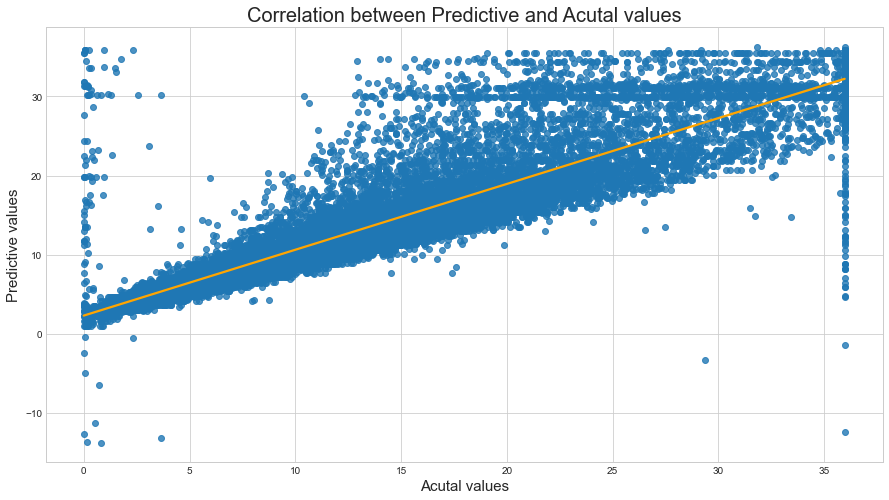

In [198]:
# Create a scatterplot to visualize `predicted` over `actual`
fig = plt.figure(figsize=(15, 8))
sns.regplot(data = results, x = 'Actual', y ='Predicted', line_kws = {'color' : 'orange'})
plt.xlabel('Acutal values', fontsize = 15)
plt.ylabel('Predictive values', fontsize = 15)
plt.title('Correlation between Predictive and Acutal values', fontsize = 20)
plt.show();

fig.savefig('images/predict_actual_regplot.png', dpi = 300, bbox_inches = 'tight')

Check the normality assumption of linear regression model that is model residuals have to be normally distributed.

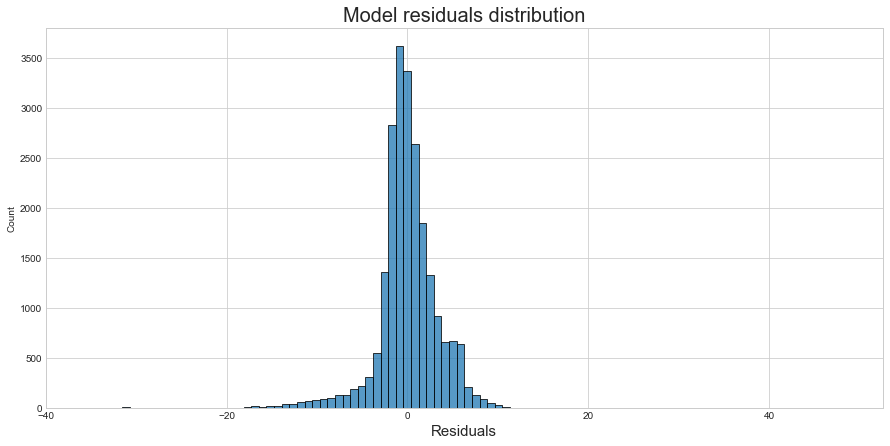

In [199]:
# Visualize the distribution of the `residuals`
fig = plt.figure(figsize = (15, 7))
sns.histplot(results.Residuals, bins = 100)
plt.title('Model residuals distribution', fontsize = 20)
plt.xlabel('Residuals', fontsize = 15)
plt.show();

fig.savefig('images/resid_dist.png', dpi = 300, bbox_inches = 'tight')

Since residuals fitted in normal distribution, the normality assumtion is met

Create a scatterplot of `residuals` over `predicted` for checking Homoscedasticity assumption which conveys the variance of the error is constant or similar across the model

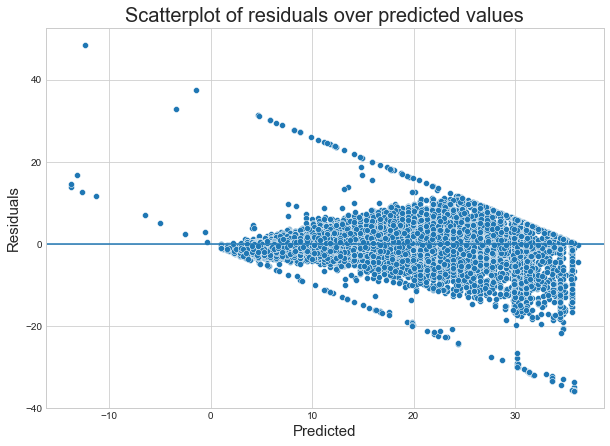

In [200]:
# Create a scatterplot of `residuals` over `predicted`
fig = plt.figure(figsize = (10, 7))
sns.scatterplot(data = results, x = 'Predicted', y = 'Residuals')
plt.axhline(0)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Residuals', fontsize = 15)
plt.title('Scatterplot of residuals over predicted values', fontsize = 20)
plt.show();

fig.savefig('images/homoscedasticity_assump.png', dpi = 300, bbox_inches = 'tight')

## Step 4c. Assumption Conclusion


- **Linearity** : independent vairables selected for linear model is carefully accessed by correlated score and graphs which assures the predictors have good relationship with outcome variable.


- **Normality** : the model residuals are normally distributed indicating this assumption is met.


- **Independent Observations** : this assumption requires understanding of data sources and data collecting process. By default, there's not reason to beleive each trip (observation) in the data set is dependent to each other.


- **Homoscedasticity** : As being presented on the scatter plot between predicted values and residuals, the variance of error is nearly constant across fitted values.


## Step 4d. ANOVA Analysis

Given all assumptions are met, I perform ANOVA analysis in order to comfirm the model's coefficients are statistically significant, and to dive further to relationship between each group in categorical vairables to the depedent variable.

Based on the OLS model summary, the 3 categorical variables `mta_tax`, `RatecodeID`, `payment_type` have $\beta$ coefficients with $P-value < 0.05$ which indicates the relationship of these variables with the outcome vairable `trip_duration` is statistically significant. But it can't be sure if there is a significant difference between the various groups in each categorical predictor. This is where ANOVA analysis comes in useful to explore further.

---
**The ANOVA analysis includes 4 steps:**

1. State the null and alternative hypothesis
2. Choose a significant level
3. Find the P-value 
4. Reject or fail to reject the null hypothesis
5. Perform post hoc test if the null hypothesis is rejected

### Step 4d.1 Two independent T-test  for "*mta_tax*"

#### State the null and alternative hypothesis
- $ H_0 : \mu_{(MTAtax=True)} = \mu_{(MTAtax=False)} $

There is no difference in trip duration based on being MTA tax charged and not being MTA tax charged
- $ H_a : \mu_{(MTAtax=True)} \not= \mu_{(MTAtax=False)} $

There is a difference in trip duration based on being MTA tax charged and not being MTA tax charged


#### Chose a significant level
A typical significant level for statistical test is $\alpha = 0.05$


#### Find P-value and conclude Hypothesis test result

In [201]:
# prepare data for hypothesis test
mta_tax_True = final_data[final_data['mta_tax'] == '1']['trip_duration']
mta_tax_False = final_data[final_data['mta_tax'] == '0']['trip_duration']

# calculate P-value
from scipy.stats import ttest_ind
t, p = ttest_ind(mta_tax_True, mta_tax_False, equal_var = False)
print('T-score:', t)
print('P-value:', p)

# Conclude the hypothesis test
if p < 0.05:
    print('''With P-value < 0.05, reject H_0, There is significant difference in trip duration 
between being MTA tax charged and not being MTA tax charged.''')
else:
    print('''With P-value > 0.05, fail to reject H_0, There is no difference in trip duration 
between being MTA tax charged and not being MTA tax charged''')

T-score: -4.035681329267439
P-value: 0.00011473409806456694
With P-value < 0.05, reject H_0, There is significant difference in trip duration 
between being MTA tax charged and not being MTA tax charged.


### Step 4d.2 One-way ANOVA  for "*RatecodeID*"

#### State the null and alternative hypothesis
- $ H_0 : \mu_{(1)} = \mu_{(2)} = \mu_{(3)} = \mu_{(4)} = \mu_{(5)} = \mu_{(6)} $

There is no difference in trip duration based on different RatecodeID
- $ H_a $: Not $ \mu_{(1)} = \mu_{(2)} = \mu_{(3)} = \mu_{(4)} = \mu_{(5)} = \mu_{(6)} $

There is a difference in trip duration based on different RatecodeID


#### Chose a significant level
A typical significant level for statistical test is $\alpha = 0.05$

#### Find P-value

In [202]:
OLS = ols(formula = 'trip_duration ~ C(RatecodeID)', data = final_data[['RatecodeID', 'trip_duration']])
model = OLS.fit()

# calculate P-value
import statsmodels.api as sm
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(RatecodeID),4.0,1.869442e+05,46736.058361,605.747835,0.0
Residual,22680.0,1.749860e+06,77.154313,NaN,NaN


#### Conclude hypothesis test result

- PR(>F) = 0.0 indicates the P-value is smaller than 0.000000 which is less than 0.05. As the result, I reject $H_0$ and state that there is a significant difference in trip duration based on different RatecodeID.


- Post-hoc test would need performing to determine how one pair of groups different from each other.

#### Perform Post-hoc test - Tukey's HSD

In [203]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_oneway_1 = pairwise_tukeyhsd(endog = final_data['trip_duration'], 
                                   groups = final_data['RatecodeID'], 
                                   alpha = 0.05)
tukey_oneway_1.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,18.7549,0.001,17.6847,19.825,True
1.0,3.0,15.2434,0.001,11.4031,19.0838,True
1.0,4.0,16.374,0.001,7.9007,24.8473,True
1.0,5.0,-0.1557,0.9,-3.0659,2.7546,False
2.0,3.0,-3.5114,0.1136,-7.4916,0.4687,False
2.0,4.0,-2.3809,0.9,-10.9184,6.1567,False
2.0,5.0,-18.9105,0.001,-22.0029,-15.8181,True
3.0,4.0,1.1306,0.9,-8.1696,10.4307,False
3.0,5.0,-15.3991,0.001,-20.2122,-10.586,True
4.0,5.0,-16.5297,0.001,-25.4859,-7.5734,True


meandiffs of pair of groups that is statistically significant (p-value < 0.05) include:
- $\mu_{1} \not= \mu_{2}$ : The variance in `trip_duration` average is statistically significant between `RatecodeID = 1` and `RatecodeID = 2`. On average, trip with `RatecodeID = 2` will have 18.7549 minutes greater in duration than trip with `RatecodeID = 1`.


- $\mu_{1} \not= \mu_{3}$ : Similarly, there's a statistically significant difference in average trip duration between `RatecodeID = 1` and `RatecodeID = 3`. Averagely, duration from trip with `RatecodeID = 3` is 15.2434 minutes greater than that from trip with `RatecodeID = 1`.


- $\mu_{1} \not= \mu_{4}$ : The average trip duration in group with `RatecodeID = 4` is statistically 16.374 minutes greater than `RatecodeID = 1` group.


- $\mu_{2} \not= \mu_{5}$ : The average trip duration in group `RatecodeID = 5` is 18.9105 less than that in group `RatecodeId = 2`.


- $\mu_{3} \not= \mu_{5}$ : The average trip duration in group `RatecodeID = 5` is 15.3991 less than that in group `RatecodeId = 2`.


- $\mu_{4} \not= \mu_{5}$: The average trip duration in group `RatecodeID = 5` is 16.5297 less than that in group `RatecodeId = 2`.


=> Tukey's HSD test indicates that the mean `trip_duration` is significantly higher for groups 2, 3, and 4 compared to group 1, while the mean `trip_duration` is significantly lower for group 5 compared to all other groups.

### Step 4d.3 One-way ANOVA  for "*payment_type*"


#### State the null and alternative hypothesis
- $ H_0 : \mu_{(1)} = \mu_{(2)} = \mu_{(3)} = \mu_{(4)} $

There is no difference in trip duration based on different payment types
- $ H_a $: Not $ \mu_{(1)} = \mu_{(2)} = \mu_{(3)} = \mu_{(4)} $

There is a difference in trip duration based on different payment types


#### Chose a significant level
A typical significant level for statistical test is $\alpha = 0.05$

#### Find P-value

In [204]:
OLS = ols(formula = 'trip_duration ~ C(payment_type)', data = final_data[['payment_type', 'trip_duration']])
model = OLS.fit()

# calculate P-value
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(payment_type),3.0,5.999451e+03,1999.817146,23.491684,3.561208e-15
Residual,22681.0,1.930805e+06,85.128725,NaN,NaN


#### Conclude hypothesis test result

- The P-value `PR(>F)` is less than 0.05 => Reject $H_0$ and state that there is a significant difference in trip duration based on different payment types.


- Post-hoc test would need performing to determine how one pair of groups different from each other.

#### Perform Post-hoc test - Tukey's HSD

In [205]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_oneway_2 = pairwise_tukeyhsd(endog = final_data['trip_duration'], 
                                groups = final_data['payment_type'], 
                                alpha = 0.05)
tukey_oneway_2.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-1.0227,0.001,-1.3606,-0.6849,True
1,3,-2.8937,0.0047,-5.1222,-0.6653,True
1,4,1.2746,0.7954,-2.4784,5.0276,False
2,3,-1.871,0.1379,-4.1085,0.3665,False
2,4,2.2973,0.3969,-1.4611,6.0557,False
3,4,4.1683,0.0667,-0.1879,8.5246,False


The mean difference that is statsitically significant (P-value < 0.05) between groups:
- $\mu_1 \not= \mu_2$ : The variance in `trip_duration` average is statistically significant between `payment_type = 1` and `payment_type = 2`. On average, trip with `payment_type = 2` will have 1.0227 minutes less in duration than trip with `payment_type = 1`.


- $\mu_1 \not= \mu_3$ : there's a statistically significant difference in average trip duration between `payment_type = 1` and `payment_type = 3`. Averagely, duration from trip with `payment_type = 3` is 2.8937 minutes less than that from trip with `payment_type = 1`.

In [206]:
display(ols_model.summary(),
        'RatecodeID Tukey HSD result:', tukey_oneway_1.summary(), 
        'payment_type Tukey HSD result:', tukey_oneway_2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 1.019e+04
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        00:24:21   Log-Likelihood:                -62415.
No. Observations:               22685   AIC:                         1.249e+05
Df Residuals:                   22673   BIC:                         1.250e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.7297      0.826      4.514      0.000       2.110       5.349
C(mta_tax)[T.1]         -6.4113      0.824     -7.779      0.000      -8.027      -4.796
C(RatecodeID)[T.2.0]     0.2948      0.195      1.511      0.131      -0.088       0.677
C(RatecodeID)[T.3.0]    -6.8402      1.049     -6.522      0.000      -8.896      -4.785
C(RatecodeID)[T.4.0]    -4.1409      1.344     -3.082      0.002      -6.774      -1.507
C(RatecodeID)[T.5.0]   -17.6047      0.717    -24.540      0.000     -19.011     -16.199
C(payment_type)[T.2]     1.0863      0.079     13.697      0.000       0.931       1.242
C(payment_type)[T.3]    -0.2235      0.362     -0.617      0.537      -0.933       0.486
C(payment_type)[T.4]     1.4647      0.604      2.425      0.015       0.281       2.649
total_amount             1.1839      0.005    242.942      0.000       1.174       1.193
tip_amount              -0.5553      0.027    -20.309      0.000      -0.609      -0.502
tolls_amount            -0.1974      0.024     -8.249      0.000      -0.244      -0.150
==============================================================================
Omnibus:                     7866.151   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           238366.079
Skew:                          -1.051   Prob(JB):                         0.00
Kurtosis:                      18.741   Cond. No.                     1.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

'RatecodeID Tukey HSD result:'

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,18.7549,0.001,17.6847,19.825,True
1.0,3.0,15.2434,0.001,11.4031,19.0838,True
1.0,4.0,16.374,0.001,7.9007,24.8473,True
1.0,5.0,-0.1557,0.9,-3.0659,2.7546,False
2.0,3.0,-3.5114,0.1136,-7.4916,0.4687,False
2.0,4.0,-2.3809,0.9,-10.9184,6.1567,False
2.0,5.0,-18.9105,0.001,-22.0029,-15.8181,True
3.0,4.0,1.1306,0.9,-8.1696,10.4307,False
3.0,5.0,-15.3991,0.001,-20.2122,-10.586,True
4.0,5.0,-16.5297,0.001,-25.4859,-7.5734,True


'payment_type Tukey HSD result:'

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-1.0227,0.001,-1.3606,-0.6849,True
1,3,-2.8937,0.0047,-5.1222,-0.6653,True
1,4,1.2746,0.7954,-2.4784,5.0276,False
2,3,-1.871,0.1379,-4.1085,0.3665,False
2,4,2.2973,0.3969,-1.4611,6.0557,False
3,4,4.1683,0.0667,-0.1879,8.5246,False


# Results Summary


The conclusion is performed by taking into consideration of OLS model, T-test, ANOVA, and Tukey's HSD results from the above analysis.


---
### Trip duration vs "*mta_tax*"
Given the name of the variable `C(mta_tax)[T.1]` in the OLS model result , we know that `C(mta_tax)[T.0]` is the reference point. The T-test result conveys that the average duration between trips being MTA tax charged and trips not being MTA tax charged is significantly different. This means that if all other variables are constant, then we would expect trips with `(mta_tax = 1)` to be $6.4113$ minutes less in duration compared to ones with `(mta_tax = 0)`. The 95% confidence intervals for the coefficient means there's 95% chance that the interval $[-8.027, -4.796]$ contains the true parameter of the slope of $\beta_{mta-tax}$.



### Trip duration vs "*RatecodeID*" and "*payment_type*"


Based on the result of OLS model, reference points for `RatecodeID` and `payment_type` are `(RatecodeID = 1.0)` and `(payment_type = 1)` respectively. 
- While the OLS model did not find statistical significance in the coefficient for `(RatecodeID = 2.0)`, with a p-value of 0.131, the results of the ANOVA and Tukey HSD tests conveys that there is a statistically significant difference between the mean values of group 1 `(RatecodeID 1.0)` and group 2 `(RatecodeID 2.0)`. The mean difference between the two groups is 18.75 with a p-value of 0.001, indicating that the difference is unlikely to have occurred by chance. 


- The same is true for `payment_type`. whereas the OLS result shows there's no statistical significance in the coefficient for `(payment_type = 3)`, with p-value of 0.537, ANOVA and Tukey HSD tests represents that there's a significant difference between the mean values of group 1 `(payment_type = 1)` and group 3 `(payment_type = 3)`. The mean difference between the two groups is 2.8937 with a p-value of 0.0047, indicating that the difference is unlikely to have occurred by chance. 


The difference between the two results could be due to the fact that the OLS model only takes into account the effect of each predictor variable on the response variable individually, without considering the effects of other variables. On the other hand, ANOVA and Tukey HSD tests are designed to compare the means of different groups, taking into account the effects of all variables in the model.

Therefore, It is important to consider the limitations of the method indicating that the differences between the groups in the two categorical variables `RatecodeID` and `payment_type` are more complex than a simple linear relationship captured by the OLS model.


### Trip duration vs "*total_amount*"


Based on OLS result, with the $P-value = 0.000$, which is less than 0.05, we can state that there's a relationship between `total_mount` and `trip_duration`, and the coefficient $\beta_{(TotalAmount)}$ is statistically significant. The model predicts that if other variables are constant, except $1$ dollar increase in `total_amount`, will result in $1.1839$ minute rise of trip duration. 95% confidence interval of the coefficient is $[1.174, 1.193]$



### Trip duration vs "*tip_amount*"


Similar to `total_amount`, the relationship of `trip_duration` and `tip_amount` is statistically significant with the $P-value = 0.000$. if other variables are constant, We would expect that with an increase by $1$ dollar in `tip_amount`, duration of trip will decrease by $0.5553$ minute. 95% confidence interval of the coefficient is $[-0.609, -0.502]$



### Trip duration vs "*tolls_amount*"


The OLS model suggests that the `tolls_amount` coefficient is statistically significant with $P-value =  0.000$. if we compare two trips which have the same characteristics, except one trip's tolls amount is 1 dollar greater, we would expect the trip with the greater tolls amount to have 0.1974 minute less duration than the trip with the less tolls amount. 95% confidence interval of the coefficient is $[-0.244, -0.150]$

---
# Create a predictive Sklearn model based on new variables from the above analyis

## Data Preparation

Set Y and X variables. Y represents the outcome variable, and X represents the features.

In [207]:
# divide variables
Y = final_data['trip_duration']
X = final_data[['mta_tax', 'total_amount', 'tip_amount', 'tolls_amount']]
display(X, Y)

,mta_tax,total_amount,tip_amount,tolls_amount
0,1,16.560,2.760,0.00
1,1,20.800,4.000,0.00
2,1,8.750,1.450,0.00
3,1,27.690,6.125,0.00
4,1,17.800,0.000,0.00
...,...,...,...,...
22694,1,5.800,0.000,0.00
22695,1,31.375,6.125,5.76
22696,1,5.300,0.000,0.00
22697,1,13.000,1.700,0.00


0        14.070
1        26.500
2         7.200
3        30.250
4        16.720
          ...  
22694     3.270
22695    35.975
22696     4.130
22697    11.930
22698    13.330
Name: trip_duration, Length: 22685, dtype: float64

Perform Standard Scaler for predictive variables

In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled, columns = X.columns) 
scaled_X

,mta_tax,total_amount,tip_amount,tolls_amount
0,0.063112,0.282115,0.649661,-0.223447
1,0.063112,0.828070,1.366716,-0.223447
2,0.063112,-0.723523,-0.107873,-0.223447
3,0.063112,1.715247,2.595539,-0.223447
4,0.063112,0.441781,-0.946364,-0.223447
...,...,...,...,...
22680,0.063112,-1.103374,-0.946364,-0.223447
22681,0.063112,2.189738,2.595539,3.892040
22682,0.063112,-1.167755,-0.946364,-0.223447
22683,0.063112,-0.176281,0.036695,-0.223447


Create training and testing sets.

In [209]:
# Create training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_X, Y, test_size = 0.2, random_state = 42)

## Build Multi linear regression using Sklearn

Build and fit your model to the data.

In [210]:
# Build and fit your model to the data
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

## Evaluate model

Evaluate model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [211]:
# Evaluate the model performance on the testing data
y_pred = lr_model.predict(x_test)
results = pd.DataFrame(data = {"actual": y_test,
                             "predicted": y_pred})
results["residual"] = results["actual"] - results["predicted"]
results.head()

,actual,predicted,residual
11823,3.78,4.752947,-0.972947
12678,13.67,12.280951,1.389049
8942,9.45,10.069487,-0.619487
10286,1.02,3.930525,-2.910525
11631,11.70,10.999646,0.700354


In [212]:
# Evaluate the model performance on the testing data
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

print("R^2:", r2_score(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R^2: 0.8151016457197737
RMSE: 3.938836736070312
MAE: 2.443858726692992


In [213]:
# check for overfitting and underfitting
train_score = lr_model.score(x_train, y_train)
test_score = lr_model.score(x_test, y_test)
print(f'Train dataset R-squred: {train_score}')
print(f'Test dataset R-Squred: {test_score}')

Train dataset R-squred: 0.8268238799453974
Test dataset R-Squred: 0.8151016457197737


In [214]:
# save model
import joblib
joblib.dump(lr_model, 'Multi_Linear_Regression.pkl')

['Multi_Linear_Regression.pkl']

In [215]:
# load model
loaded_model = joblib.load('Multi_Linear_Regression.pkl')
loaded_model.predict(x_test[:10])

array([ 4.75294709, 12.28095099, 10.06948679,  3.93052504, 10.99964647,
       22.2325399 , 11.98588205, 10.17764831, 14.39265813,  6.95621878])

The R-squred is high and nearly equals between train and test data sets which indicates the the model is not overfitting or underfitting.

- The result is not different very much compared to OLS model that included `payment_type` and `RatecodeID`


- Other regression models, such as Tree-based model, will be more appropriate to interprete the relationship between `payment_type` and `RatecodeID` to `trip_duration` which help improve the model score.